0.0870958333060505 0.24976548714793378
0.9999999999999999


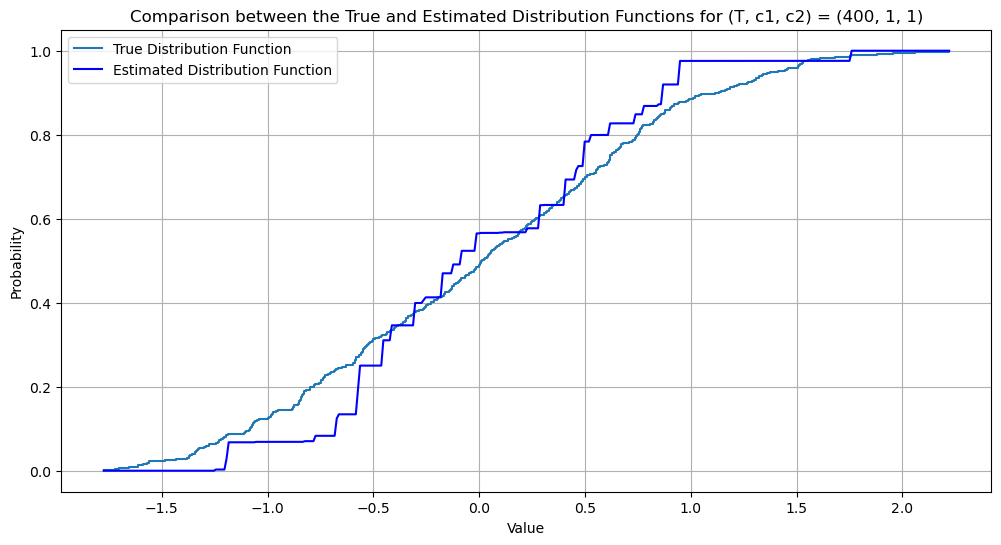

1-Wasserstein distance:  0.12320212827018992
0.174191666612101 0.31220685893491723
0.9999999999999999


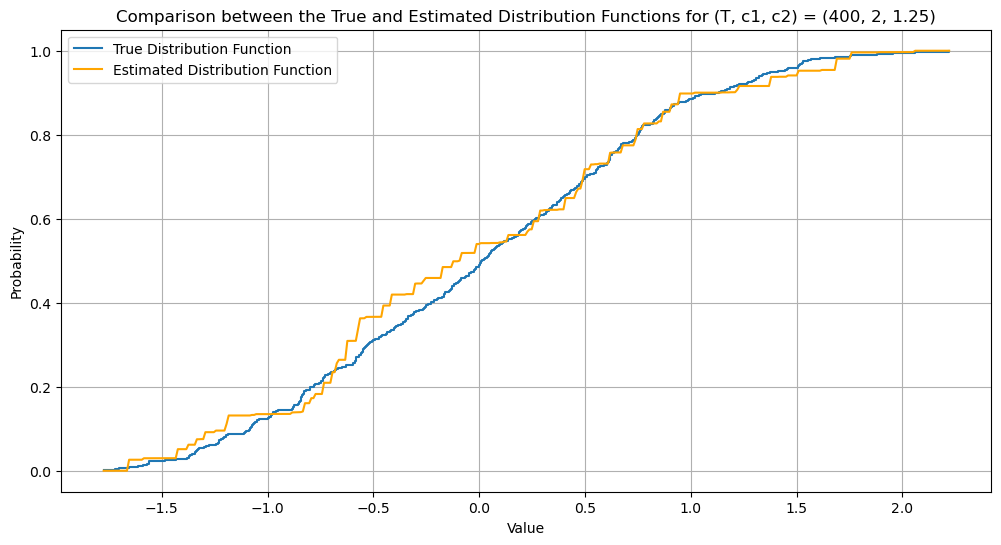

1-Wasserstein distance:  0.08754012362188429
0.2612874999181515 0.3746482307219007
0.9999999999999999


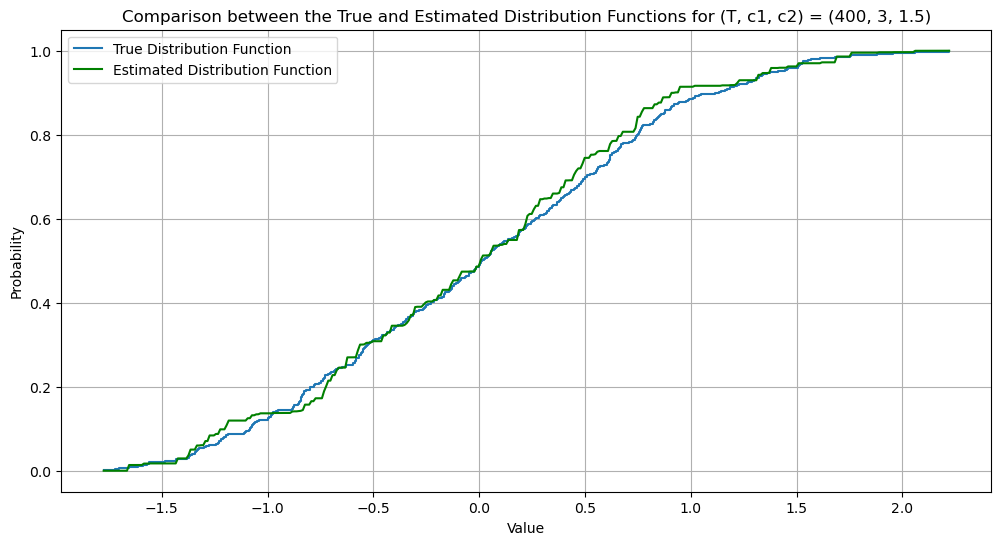

1-Wasserstein distance:  0.09190039004139514
0.348383333224202 0.4370896025088841
1.0


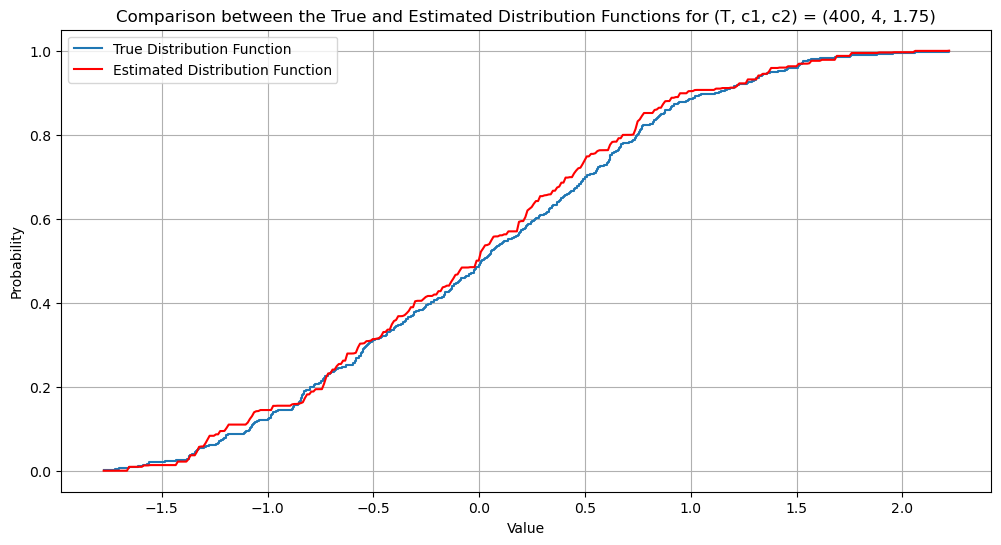

1-Wasserstein distance:  0.09226501811142993
0.4354791665302525 0.49953097429586757
1.0


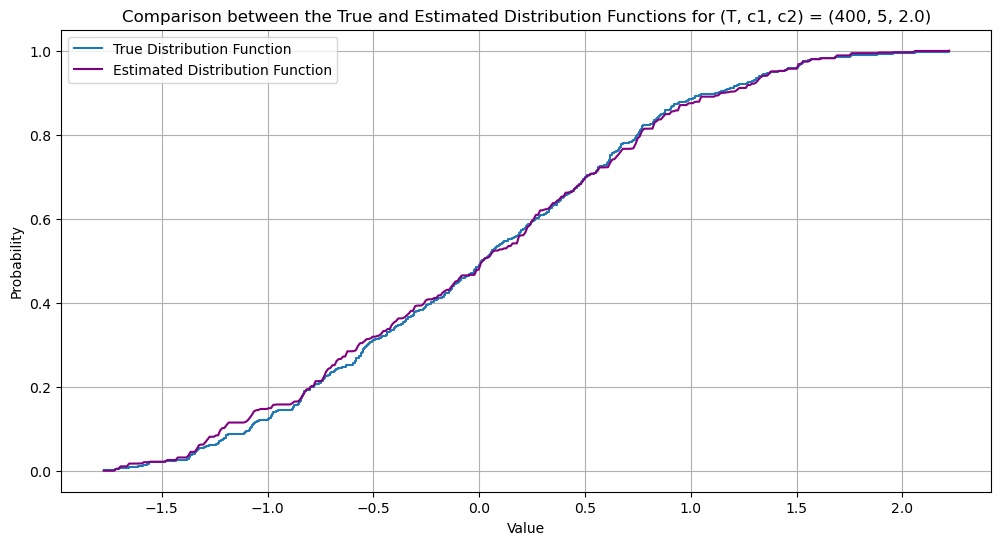

1-Wasserstein distance:  0.07887654093428922
0.522574999836303 0.5619723460828511
0.9999999999999999


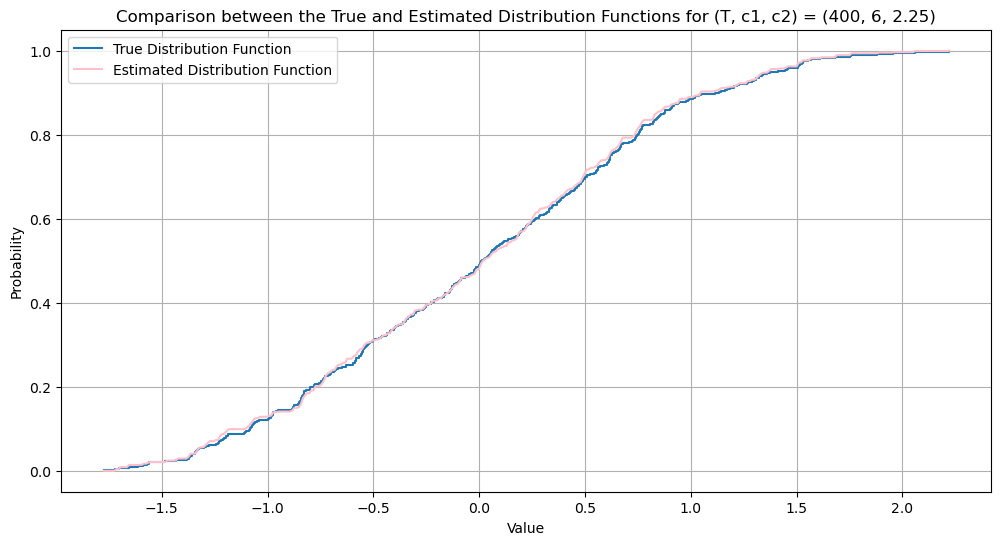

1-Wasserstein distance:  0.08568709394683602
0.6096708331423535 0.6244137178698345
0.9999999999999999


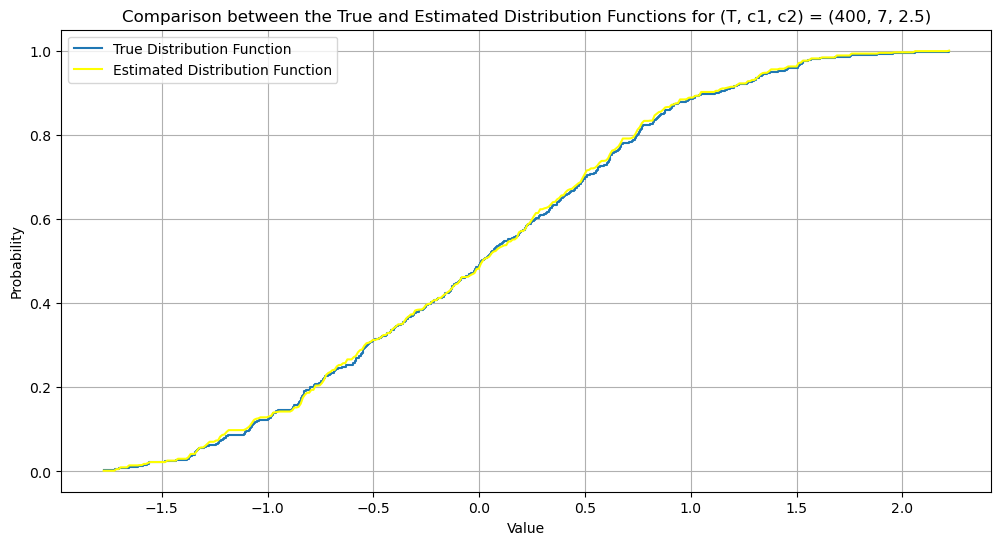

1-Wasserstein distance:  0.08555626300276145
0.696766666448404 0.6868550896568179
1.0


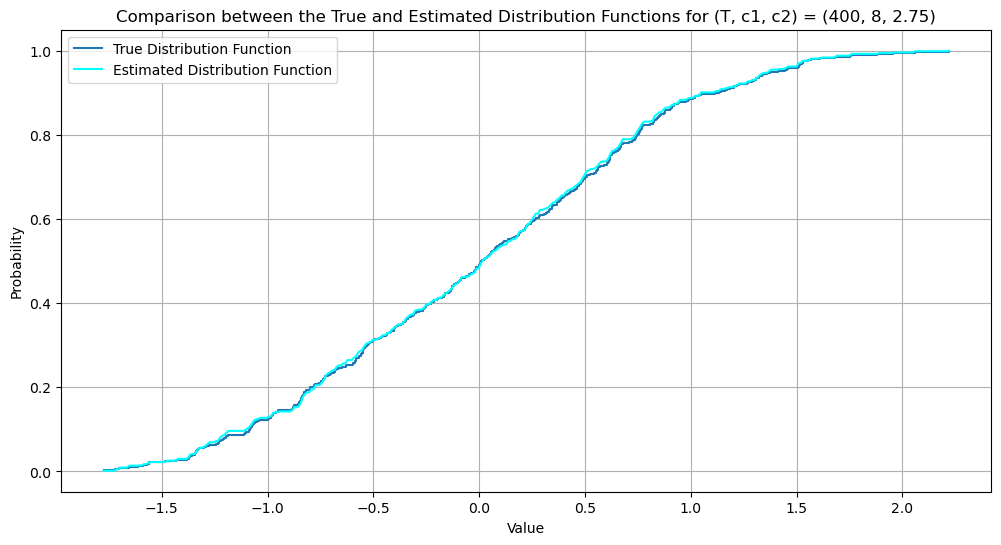

1-Wasserstein distance:  0.0854207708984091


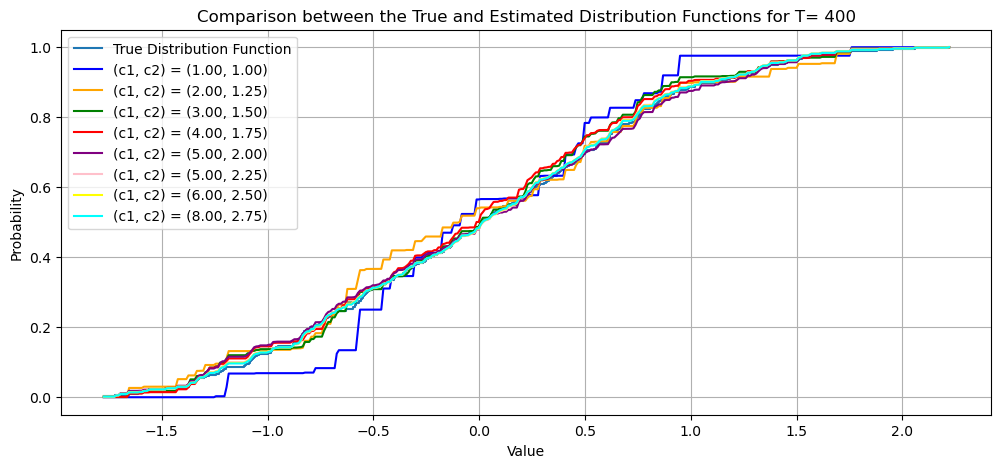

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Defining the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

# Defining the empirical conditional distribution function estimator
def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels for K1
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels for K2
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))


#####################################################################################################
#Example

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 1
c2 = 1

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h1 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h1 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h1, label="Estimated Distribution Function", color='blue')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h1
dist2 = F_values200h1

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

#####################################################################################################

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 2
c2 = 1.25

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h2 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h2 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h2, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h2, label="Estimated Distribution Function", color='orange')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h2
dist2 = F_values200h2

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 3
c2 = 1.5

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h3 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h3 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h3, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h3, label="Estimated Distribution Function", color='green')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h3
dist2 = F_values200h3

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 4
c2 = 1.75

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h4 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h4 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h4, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h4, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h4
dist2 = F_values200h4

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 2.0

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h5 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h5 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h5, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h5, label="Estimated Distribution Function", color='purple')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h5
dist2 = F_values200h5

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 6
c2 = 2.25

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h6 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h6 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h6, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h6, label="Estimated Distribution Function", color='pink')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h6
dist2 = F_values200h6

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 7
c2 = 2.5

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h7 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h7 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h7, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h7, label="Estimated Distribution Function", color='yellow')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h7
dist2 = F_values200h7

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 8
c2 = 2.75

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h8 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h8 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h8, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h8, label="Estimated Distribution Function", color='cyan')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h8
dist2 = F_values200h8

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

#Summary plot of the estimated distribution functions varying c1 and c2
plt.figure(figsize=(12, 5))
plt.step(data_sorted, True_CDF200h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h1, label="(c1, c2) = (1.00, 1.00)", color='blue')
plt.plot(v_values, F_values200h2, label="(c1, c2) = (2.00, 1.25)", color='orange')
plt.plot(v_values, F_values200h3, label="(c1, c2) = (3.00, 1.50)", color='green')
plt.plot(v_values, F_values200h4, label="(c1, c2) = (4.00, 1.75)", color='red')
plt.plot(v_values, F_values200h5, label="(c1, c2) = (5.00, 2.00)", color='purple')
plt.plot(v_values, F_values200h6, label="(c1, c2) = (5.00, 2.25)", color='pink')
plt.plot(v_values, F_values200h7, label="(c1, c2) = (6.00, 2.50)", color='yellow')
plt.plot(v_values, F_values200h8, label="(c1, c2) = (8.00, 2.75)", color='cyan')
plt.title("Comparison between the True and Estimated Distribution Functions for T= 400")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


0.08329431790353775 0.24524757719321605
1.0


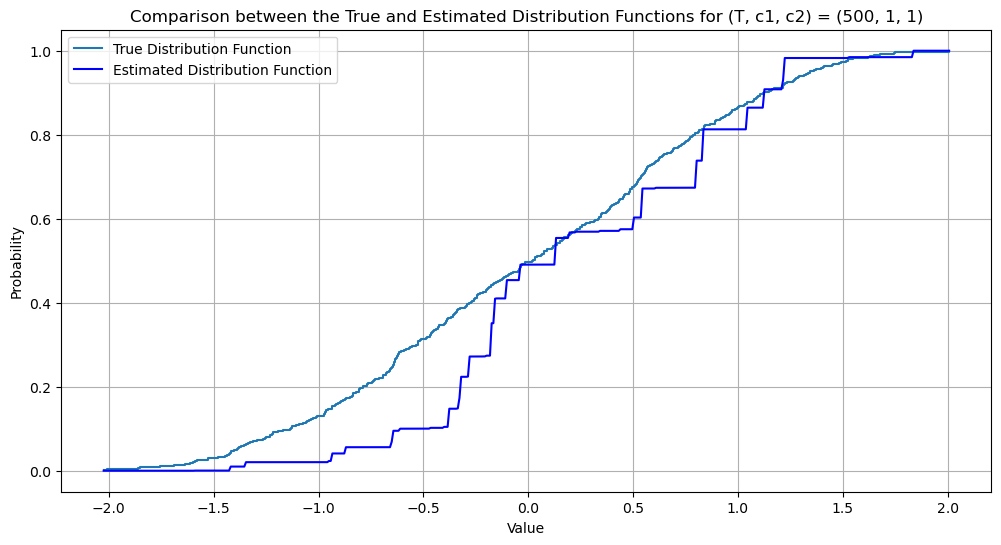

1-Wasserstein distance:  0.11261891350499714
0.1665886358070755 0.30655947149152
0.9999999999999999


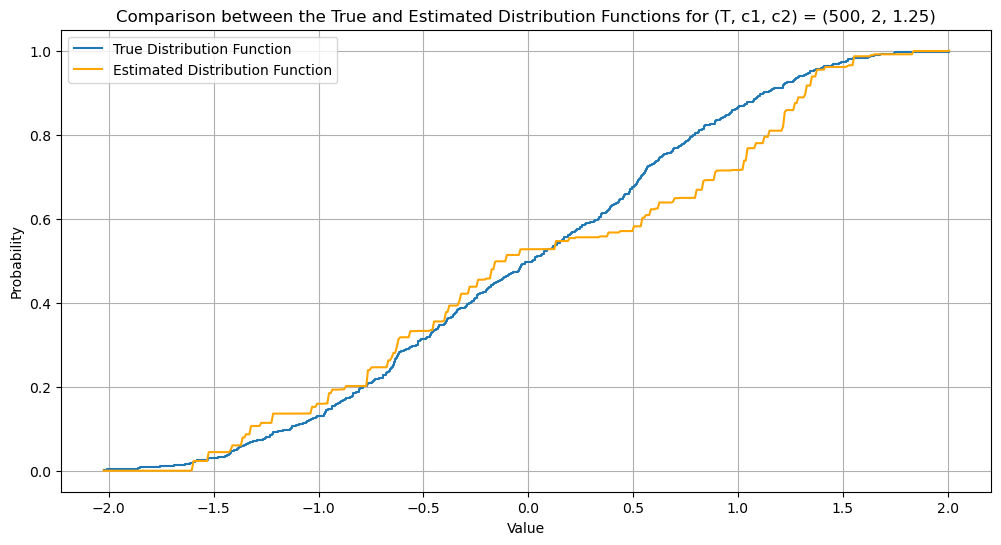

1-Wasserstein distance:  0.05079996713544942
0.24988295371061325 0.3678713657898241
1.0000000000000002


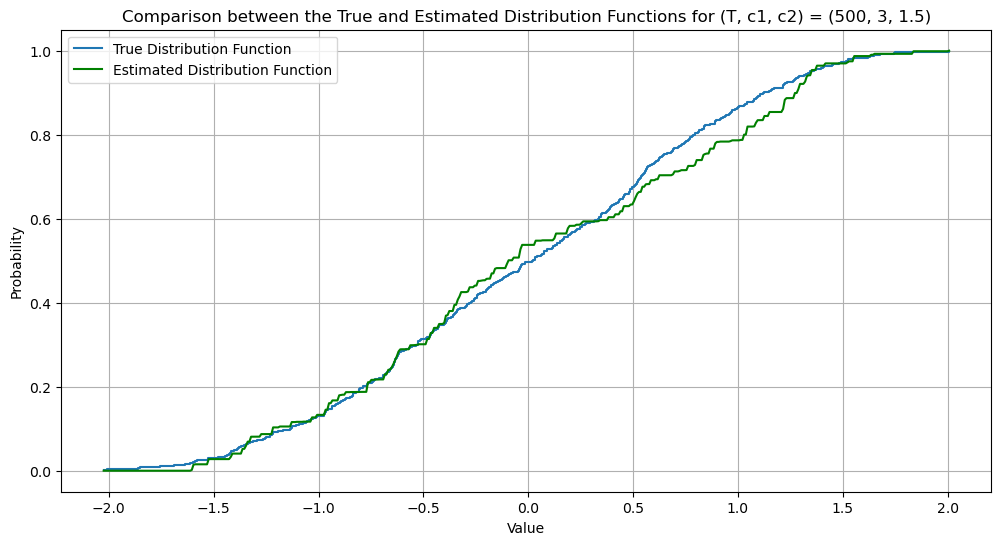

1-Wasserstein distance:  0.06092954050986846
0.333177271614151 0.42918326008812807
1.0


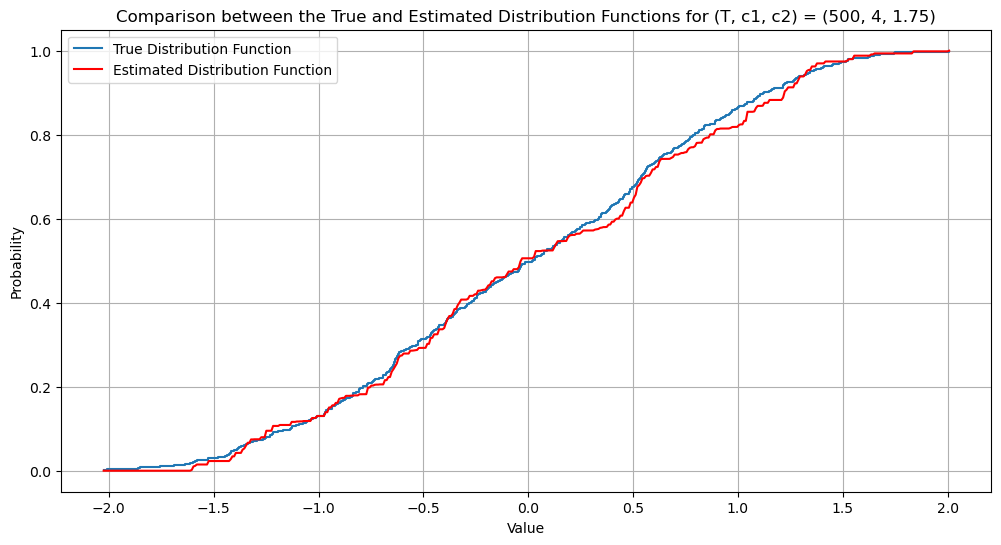

1-Wasserstein distance:  0.06826034803422597
0.41647158951768876 0.4904951543864321
1.0


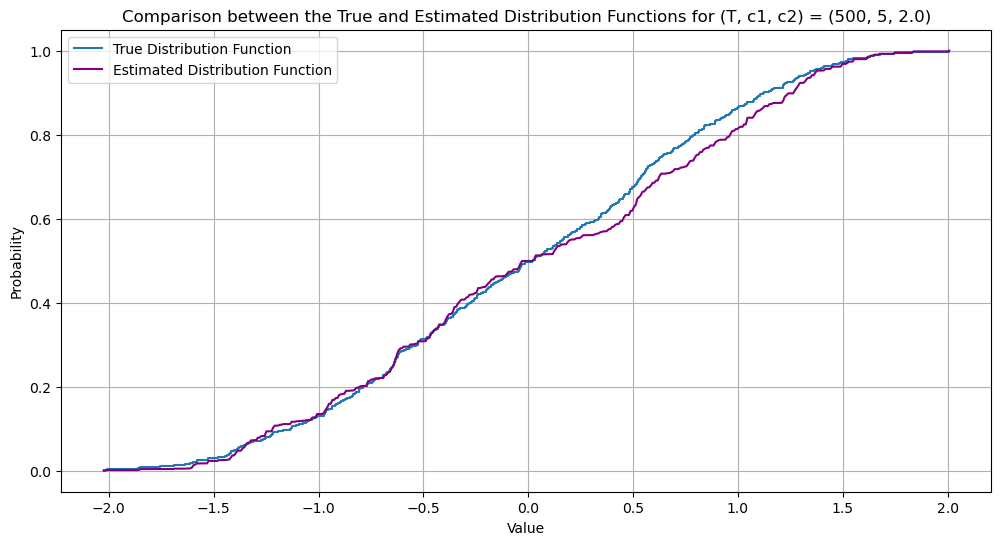

1-Wasserstein distance:  0.06074361458639707
0.4997659074212265 0.5518070486847361
1.0


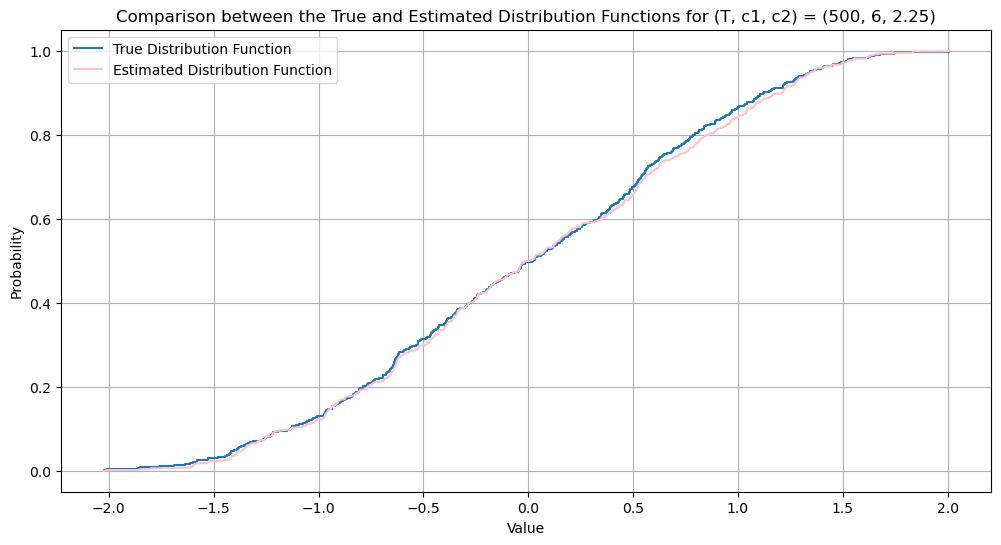

1-Wasserstein distance:  0.07054662112433455
0.5830602253247642 0.61311894298304
1.0


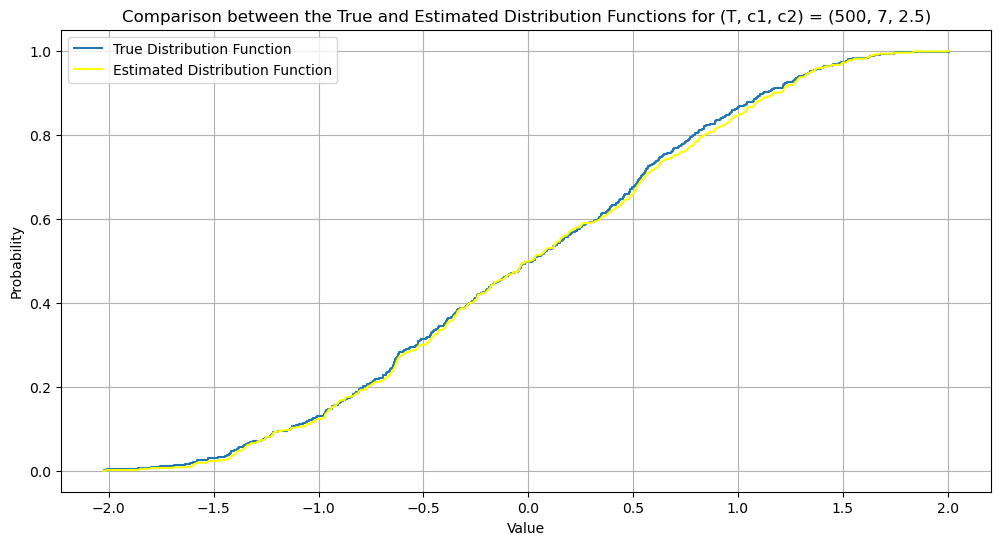

1-Wasserstein distance:  0.07093435872769424
0.666354543228302 0.674430837281344
1.0


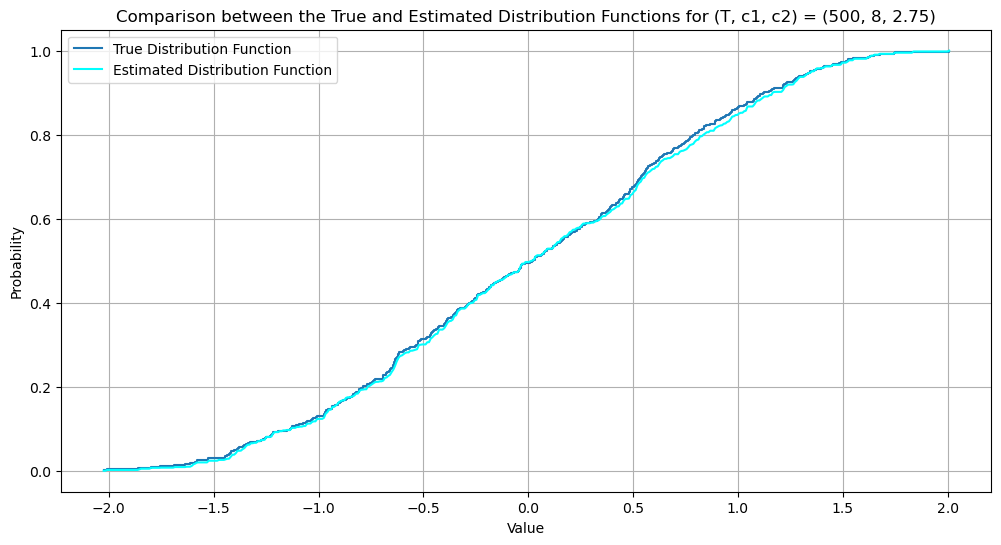

1-Wasserstein distance:  0.07122941111560625


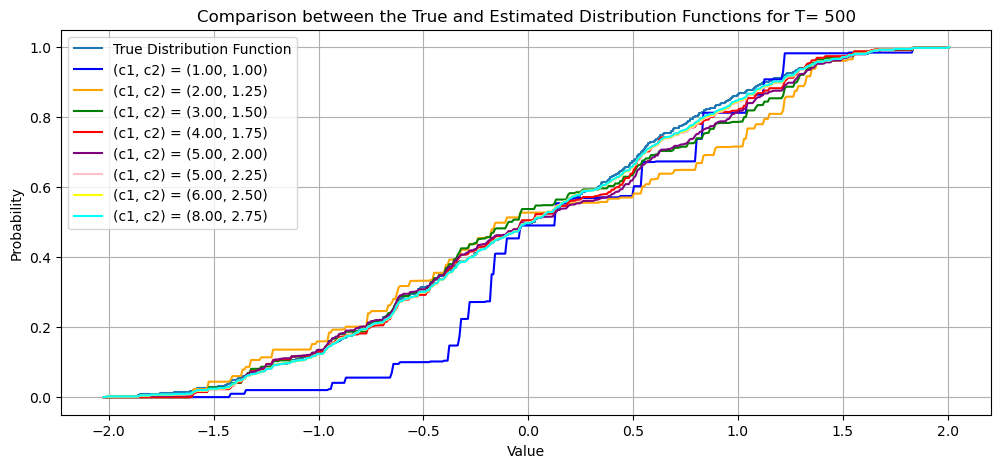

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))


#####################################################################################################
#Example

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 1
c2 = 1

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h1 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h1 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h1, label="Estimated Distribution Function", color='blue')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h1
dist2 = F_values200h1

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

#####################################################################################################

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 2
c2 = 1.25

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h2 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h2 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h2, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h2, label="Estimated Distribution Function", color='orange')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h2
dist2 = F_values200h2

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 3
c2 = 1.5

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h3 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h3 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h3, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h3, label="Estimated Distribution Function", color='green')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h3
dist2 = F_values200h3

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 4
c2 = 1.75

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h4 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h4 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h4, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h4, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h4
dist2 = F_values200h4

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 2.0

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h5 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h5 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h5, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h5, label="Estimated Distribution Function", color='purple')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h5
dist2 = F_values200h5

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 6
c2 = 2.25

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h6 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h6 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h6, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h6, label="Estimated Distribution Function", color='pink')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h6
dist2 = F_values200h6

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 7
c2 = 2.5

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h7 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h7 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h7, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h7, label="Estimated Distribution Function", color='yellow')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h7
dist2 = F_values200h7

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################
# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 8
c2 = 2.75

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200h8 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200h8 = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 6))
plt.step(data_sorted, True_CDF200h8, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h8, label="Estimated Distribution Function", color='cyan')
plt.title(f"Comparison between the True and Estimated Distribution Functions for (T, c1, c2) = ({T}, {c1}, {c2})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200h8
dist2 = F_values200h8

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

#Summary plot of the estimated distribution functions varying c1 and c2
plt.figure(figsize=(12, 5))
plt.step(data_sorted, True_CDF200h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200h1, label="(c1, c2) = (1.00, 1.00)", color='blue')
plt.plot(v_values, F_values200h2, label="(c1, c2) = (2.00, 1.25)", color='orange')
plt.plot(v_values, F_values200h3, label="(c1, c2) = (3.00, 1.50)", color='green')
plt.plot(v_values, F_values200h4, label="(c1, c2) = (4.00, 1.75)", color='red')
plt.plot(v_values, F_values200h5, label="(c1, c2) = (5.00, 2.00)", color='purple')
plt.plot(v_values, F_values200h6, label="(c1, c2) = (5.00, 2.25)", color='pink')
plt.plot(v_values, F_values200h7, label="(c1, c2) = (6.00, 2.50)", color='yellow')
plt.plot(v_values, F_values200h8, label="(c1, c2) = (8.00, 2.75)", color='cyan')
plt.title("Comparison between the True and Estimated Distribution Functions for T= 500")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()
